In [2]:
import numpy as np 
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'../data/credit_score_cleaned.csv')
df.head()

,id,customer_id,month,name,age,ssn,annual_income,monthly_inhand_salary,credit_history_age,total_emi_per_month,...,occupation_Entrepreneur,occupation_Journalist,occupation_Lawyer,occupation_Manager,occupation_Mechanic,occupation_Media_Manager,occupation_Musician,occupation_Scientist,occupation_Teacher,occupation_Writer
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,19114.12,1824.843333,89.0,49.574949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,19114.12,1824.843333,90.0,49.574949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0x1604,CUS_0xd40,3,Aaron Maashoh,23.0,821-00-0265,19114.12,1824.843333,91.0,49.574949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,19114.12,1824.843333,92.0,49.574949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,19114.12,1824.843333,93.0,49.574949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96696 entries, 0 to 96695
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        96696 non-null  object 
 1   customer_id               96696 non-null  object 
 2   month                     96696 non-null  int64  
 3   name                      96696 non-null  object 
 4   age                       96696 non-null  float64
 5   ssn                       96696 non-null  object 
 6   annual_income             96696 non-null  float64
 7   monthly_inhand_salary     96696 non-null  float64
 8   credit_history_age        96696 non-null  float64
 9   total_emi_per_month       96696 non-null  float64
 10  num_bank_accounts         96696 non-null  float64
 11  num_credit_card           96696 non-null  float64
 12  interest_rate             96696 non-null  float64
 13  num_of_loan               96696 non-null  float64
 14  type_o

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
month,96696.0,4.500000,2.291300,1.000000,2.750000,4.500000,6.250000,8.000000
age,96696.0,33.942448,10.377550,16.000000,25.000000,34.000000,42.000000,56.000000
annual_income,96696.0,50898.597486,38543.773817,7006.035000,19480.040000,37367.340000,72245.760000,179987.280000
monthly_inhand_salary,96696.0,4231.402393,3207.836030,303.645417,1634.720833,3116.120833,6016.623333,15204.633333
credit_history_age,96696.0,78.259659,33.267525,1.000000,53.000000,78.000000,105.000000,141.000000
total_emi_per_month,96696.0,106.502641,130.404213,0.000000,28.636501,65.712008,145.756868,3776.000000
num_bank_accounts,96696.0,5.319134,2.597916,0.000000,3.000000,5.000000,7.000000,11.000000
num_credit_card,96696.0,5.498211,2.057083,0.000000,4.000000,5.000000,7.000000,11.000000
interest_rate,96696.0,14.347646,8.708524,1.000000,7.000000,13.000000,20.000000,34.000000
num_of_loan,96696.0,3.481344,2.435098,0.000000,2.000000,3.000000,5.000000,9.000000


In [6]:
df.describe(include='object').T

,count,unique,top,freq
id,96696,96696,0x25fed,1
customer_id,96696,12087,CUS_0x942c,8
name,96696,9859,Jessicad,48
ssn,96696,12087,078-73-5990,8
type_of_loan,96696,5981,['No Loan'],11312


In [7]:
df = df.drop([
    "id", "customer_id", "name", "ssn", "type_of_loan"], axis=1)

df.head()

,month,age,annual_income,monthly_inhand_salary,credit_history_age,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,...,occupation_Entrepreneur,occupation_Journalist,occupation_Lawyer,occupation_Manager,occupation_Mechanic,occupation_Media_Manager,occupation_Musician,occupation_Scientist,occupation_Teacher,occupation_Writer
0,1,23.0,19114.12,1824.843333,89.0,49.574949,3.0,4.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,23.0,19114.12,1824.843333,90.0,49.574949,3.0,4.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,23.0,19114.12,1824.843333,91.0,49.574949,3.0,4.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,23.0,19114.12,1824.843333,92.0,49.574949,3.0,4.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,23.0,19114.12,1824.843333,93.0,49.574949,3.0,4.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Train-Test

In [8]:
# Separate features and target variable
X = df.drop("credit_score", axis=1)
y = df.credit_score

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Chia train + temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Chia tiếp temp thành validation + test
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


#### Chuẩn hóa dữ liệu

In [11]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer

In [12]:
# Columns to apply RobustScaler
robust_columns = ['total_emi_per_month', 'amount_invested_monthly', 'monthly_balance', "annual_income", "monthly_inhand_salary"]

# Columns to apply StandardScaler (All columns except robust columns)
standard_columns = [col for col in X_train.columns if col not in robust_columns]

# Create the ColumnTransformer
scaler = ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), standard_columns),
        ('robust', RobustScaler(), robust_columns)])

X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

#### Chạy các mô hình

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2, l1

2025-04-20 16:44:54.987833: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-20 16:44:55.005008: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-20 16:44:55.128033: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-20 16:44:55.217896: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745142295.298364    6168 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745142295.31

In [15]:
tf.random.set_seed(42)

# Model architecture
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu',),
    BatchNormalization(),
    Dropout(0.35),
    
    Dense(512, activation='relu', kernel_regularizer=l1(1e-4)),
    BatchNormalization(),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    
    Dense(3, activation='softmax')
])

# Model compilation
model.compile(optimizer=Adam(learning_rate=0.0003),  # Reduced learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping with patience and best weight restoration
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=35,
                               restore_best_weights=True)

# Model training
history = model.fit(x=X_train_scaled,
                    y=y_train,
                    validation_data=(X_valid_scaled, y_valid),
                    batch_size=1024,
                    epochs=500,
                    verbose=1,
                    callbacks=[early_stopping])

Epoch 1/500
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.4983 - loss: 1.7614 - val_accuracy: 0.6051 - val_loss: 1.4861
Epoch 2/500
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6153 - loss: 1.4631 - val_accuracy: 0.6615 - val_loss: 1.3420
Epoch 3/500
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6428 - loss: 1.3811 - val_accuracy: 0.6780 - val_loss: 1.2665
Epoch 4/500
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6581 - loss: 1.3205 - val_accuracy: 0.6885 - val_loss: 1.2242
Epoch 5/500
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6637 - loss: 1.2818 - val_accuracy: 0.6978 - val_loss: 1.1911
Epoch 6/500
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6685 - loss: 1.2502 - val_accuracy: 0.7005 - val_loss: 1.1673
Epoch 7/500
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6727 - loss: 1.2196 - val_accuracy: 0.7061 - val_loss: 1.1421
Epoch 8/500
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6793 - loss: 1.1915 - val_accuracy: 0.

<Axes: >

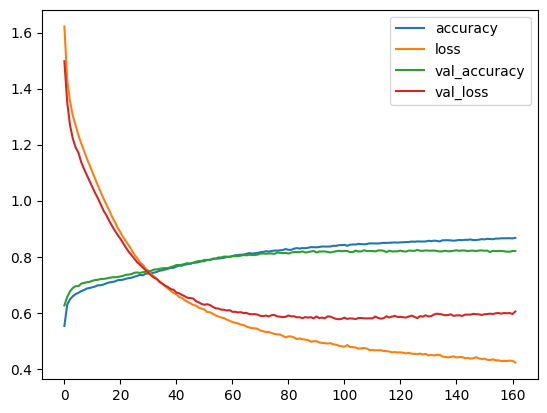

In [15]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [16]:
model.evaluate(X_test_scaled, y_test)

454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8239 - loss: 0.5814


[0.5891309976577759, 0.8187521696090698]

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
def eval_metric(model, X_test, y_test):
    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)

    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, log_loss

In [20]:
eval_metric(model, X_test_scaled, y_test)

454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Set:
[[3530  561   32]
 [ 933 6134  659]
 [  13  431 2212]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      4123
           1       0.86      0.79      0.83      7726
           2       0.76      0.83      0.80      2656

    accuracy                           0.82     14505
   macro avg       0.80      0.83      0.81     14505
weighted avg       0.82      0.82      0.82     14505



#### Navie bayes & KNN

##### KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

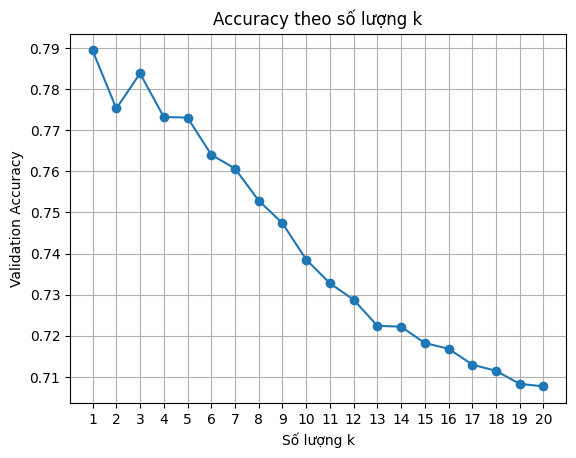

Best k là: 1, với accuracy: 0.7894


In [ ]:
k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_valid_scaled)
    acc = accuracy_score(y_valid, y_pred)
    accuracies.append(acc)

# Vẽ biểu đồ
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy theo số lượng k")
plt.xlabel("Số lượng k")
plt.ylabel("Validation Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Tìm k tốt nhất
best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best k là: {best_k}, với accuracy: {max(accuracies):.4f}")

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(1, 21))}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best k:", grid_search.best_params_['n_neighbors'])
print("Best cross-val accuracy:", grid_search.best_score_)

Best k: 1
Best cross-val accuracy: 0.771196888054978


In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Confusion Matrix:
[[3214  863   46]
 [ 900 6176  650]
 [  47  637 1972]]


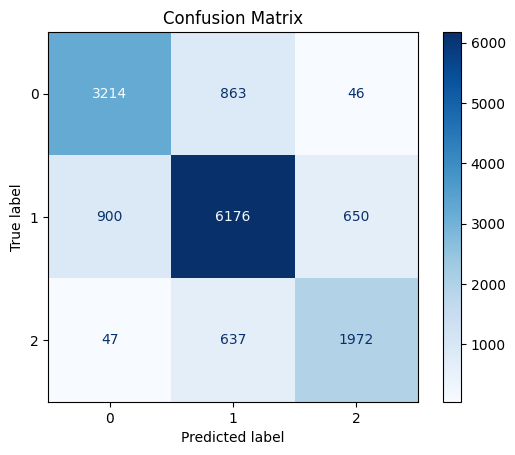

In [26]:
# Dùng best estimator để dự đoán trên tập test
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

# Tính confusion matrix
cm = confusion_matrix(y_test, y_pred)

# In confusion matrix dưới dạng số
print("Confusion Matrix:")
print(cm)

# Hiển thị confusion matrix bằng biểu đồ
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

##### Navie bayes

In [27]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Dự đoán
y_nb_pred = nb.predict(X_test_scaled)

# Đánh giá
print("Naive Bayes Results:")
print(confusion_matrix(y_test, y_nb_pred))
print(classification_report(y_test, y_nb_pred))

Naive Bayes Results:
[[2941  413  769]
 [2033 3452 2241]
 [  81  320 2255]]
              precision    recall  f1-score   support

           0       0.58      0.71      0.64      4123
           1       0.82      0.45      0.58      7726
           2       0.43      0.85      0.57      2656

    accuracy                           0.60     14505
   macro avg       0.61      0.67      0.60     14505
weighted avg       0.68      0.60      0.60     14505



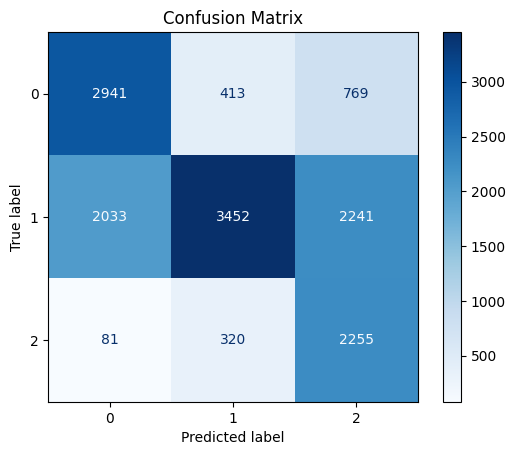

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_nb_pred))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score, log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model = LogisticRegression(penalty='l2')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print('Logistic Regression:')
print(classification_report(y_test, y_pred, digits=4))

Logistic Regression:
              precision    recall  f1-score   support

           0     0.5635    0.6754    0.6144      3527
           1     0.6608    0.5502    0.6005      5874
           2     0.7046    0.7235    0.7139     10599

    accuracy                         0.6641     20000
   macro avg     0.6430    0.6497    0.6429     20000
weighted avg     0.6669    0.6641    0.6631     20000



In [ ]:
dt_model = DecisionTreeClassifier(max_depth=22, criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
print('Decision Tree:')
print(classification_report(y_test, y_pred_dt, digits=4))

Decision Tree:
              precision    recall  f1-score   support

           0     0.6830    0.7105    0.6965      3527
           1     0.7415    0.7705    0.7557      5874
           2     0.7824    0.7550    0.7685     10599

    accuracy                         0.7517     20000
   macro avg     0.7356    0.7453    0.7402     20000
weighted avg     0.7529    0.7517    0.7520     20000



In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print('Random Forest (Tuned):')
print(classification_report(y_test, y_pred_rf, digits=4))

Random Forest (Tuned):
              precision    recall  f1-score   support

           0     0.7833    0.7613    0.7721      3527
           1     0.8033    0.8372    0.8199      5874
           2     0.8306    0.8189    0.8247     10599

    accuracy                         0.8142     20000
   macro avg     0.8057    0.8058    0.8056     20000
weighted avg     0.8143    0.8142    0.8140     20000



In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
print('SVM:')
print(classification_report(y_test, y_pred_svm, digits=4))

SVM:
              precision    recall  f1-score   support

           0     0.6116    0.7224    0.6624      3527
           1     0.7605    0.6975    0.7276      5874
           2     0.7778    0.7667    0.7722     10599

    accuracy                         0.7386     20000
   macro avg     0.7167    0.7289    0.7208     20000
weighted avg     0.7434    0.7386    0.7398     20000

